# Concentration gradient and velocity

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output
from corr_utils import *

In [3]:
folder = r'D:\density_fluctuations\08032020\concgrad_velocity\01'
corr = np.load(os.path.join(folder, 'corr_evolution.npy'))

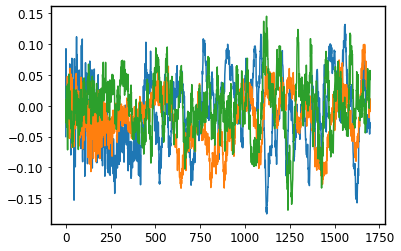

In [3]:
for n in [2, 5, 8]:
    folder = r'D:\density_fluctuations\08032020\concgrad_velocity\{:02d}'.format(n)
    corr = np.load(os.path.join(folder, 'corr_evolution.npy'))
    t = np.array(range(0, len(corr)))
    plt.plot(corr[t>100])
#     print(corr[t>1300].mean())

In [61]:
folder = r'D:\density_fluctuations\08032020\concgrad_velocity\07'
corr_field = np.load(os.path.join(folder, 'corr_whole.npy'))
stack = np.load(r'D:\density_fluctuations\08032020\small_imseq\07\stack.npy')

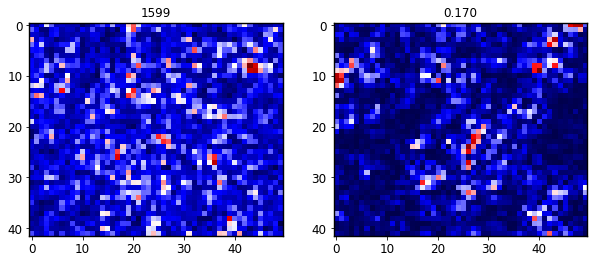

In [63]:
for n in range(1300, 1600):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    im1 = stack[2*n-5:2*n+5].std(axis=0)
    ax[0].imshow(im1, cmap='seismic')
    ax[0].set_title(str(n))
    ax[1].imshow(abs(corr_field[n]), cmap='seismic')
    ax[1].set_title('{:.3f}'.format(corr2d(im1, abs(corr_field[n]))))
    plt.pause(0.01)
    clear_output(wait=True)

In [5]:
# folder = r'E:\moreData\08032020\concgrad_velocity\01'
# corr_field = np.load(os.path.join(folder, 'corr_whole.npy'))
stack = np.load(r'E:\moreData\08032020\small_imseq\01\stack.npy')

corr_mag: 0.2029916806004967
corr: -0.09632006286704925


Text(0.5, 1.0, 'adv')

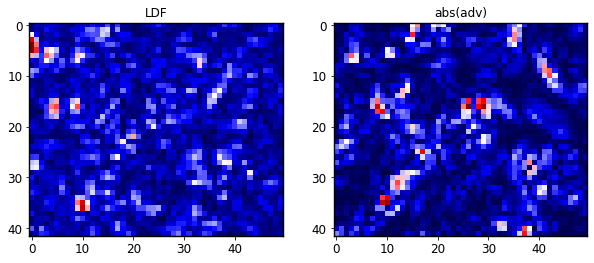

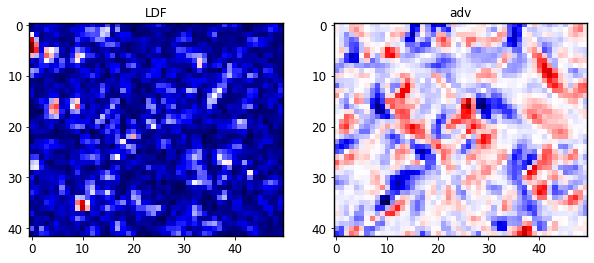

In [74]:
n = 1600 # frame 3000
ldf = stack[2*n:2*n+10].std(axis=0)
adv_mag = abs(corr_field[n])
adv = corr_field[n]
corr_mag = corr2d(ldf, adv_mag)
corr = corr2d(ldf, adv)
print('corr_mag: ' + str(corr_mag))
print('corr: ' + str(corr))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(ldf, cmap='seismic')
ax[0].set_title('LDF')
ax[1].imshow(adv_mag, cmap='seismic')
ax[1].set_title('abs(adv)')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(ldf, cmap='seismic')
ax[0].set_title('LDF')
ax[1].imshow(adv, cmap='seismic')
ax[1].set_title('adv')


In [70]:
n = 1600 # frame 3000
df = stack[2*n] - stack[2*n+10]
adv_mag = abs(corr_field[n])
adv = corr_field[n]
corr_mag = corr2d(df, adv_mag)
corr = corr2d(df, adv)
print('corr_mag: ' + str(corr_mag))
print('corr: ' + str(corr))

corr_mag: 0.04657347863946478
corr: 0.028567824272082088


In [53]:
c_list = []
for n in range(2500, 3500, 20):
    piv_folder = r'E:\moreData\08032020\piv_imseq\02'
    pivData = pd.read_csv(os.path.join(piv_folder, '{0:04d}-{1:04d}.csv'.format(n, n+1)))
    x = pivData.x.drop_duplicates()
    col = len(x)
    y = pivData.y.drop_duplicates()
    row = len(y)
    U = np.reshape(np.array(pivData.u), (row, col))
    V = np.reshape(np.array(pivData.v), (row, col))
    v_mag = U**2 + V**2
    v_mag = v_mag ** 0.5
    corr = corr2d(v_mag, stack[n-19])
    c_list.append(corr)
    print(corr)
    clear_output(wait=True)
np.array(c_list).mean()

0.016044875755883894

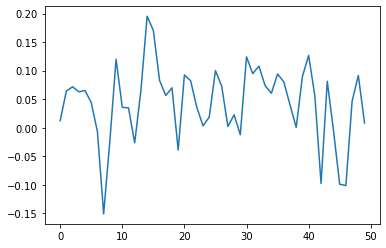

In [28]:
plt.plot(c_list)

In [25]:
np.array(c_list).mean()

0.05292656153374083